# DSE 200 FINAL PROJECT
## Fall 2022
### Due Date:  December 2nd, 2022

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _sci-kit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

# PART I: 20%

### Preliminaries

In [1]:
import numpy as np

### 1.1 Preliminaries

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
data.shape, data[:5]

((100, 10),
 array([[1, 'M', 23, 12, 151, 954, 0.143, 0.278, 0.242, 0.079],
        [2, 'B', 9, 13, 133, 1326, 0.143, 0.079, 0.181, 0.057],
        [3, 'M', 21, 27, 130, 1203, 0.125, 0.16, 0.207, 0.06],
        [4, 'M', 14, 16, 78, 386, 0.07, 0.284, 0.26, 0.097],
        [5, 'M', 9, 19, 135, 1297, 0.141, 0.133, 0.181, 0.059]],
       dtype=object))

### 1.2  Transformations

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
data = data[:, 1:] # remove first column

In [5]:
data[data[:,0:]=='M'] = 1
data[data[:,0:]=='B'] = 0
data = data.astype(float)
data.shape, data[:5]

((100, 9),
 array([[1.000e+00, 2.300e+01, 1.200e+01, 1.510e+02, 9.540e+02, 1.430e-01,
         2.780e-01, 2.420e-01, 7.900e-02],
        [0.000e+00, 9.000e+00, 1.300e+01, 1.330e+02, 1.326e+03, 1.430e-01,
         7.900e-02, 1.810e-01, 5.700e-02],
        [1.000e+00, 2.100e+01, 2.700e+01, 1.300e+02, 1.203e+03, 1.250e-01,
         1.600e-01, 2.070e-01, 6.000e-02],
        [1.000e+00, 1.400e+01, 1.600e+01, 7.800e+01, 3.860e+02, 7.000e-02,
         2.840e-01, 2.600e-01, 9.700e-02],
        [1.000e+00, 9.000e+00, 1.900e+01, 1.350e+02, 1.297e+03, 1.410e-01,
         1.330e-01, 1.810e-01, 5.900e-02]]))

### 1.3 Summary Statistics

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [6]:
data.mean(axis=0), data.std(axis=0)

(array([6.2000e-01, 1.6850e+01, 1.8230e+01, 9.6780e+01, 7.0288e+02,
        1.0273e-01, 1.2670e-01, 1.9317e-01, 6.4690e-02]),
 array([4.85386444e-01, 4.85463696e+00, 5.16692365e+00, 2.35574107e+01,
        3.18108324e+02, 1.45683596e-02, 6.08370775e-02, 3.06307215e-02,
        8.11011097e-03]))

**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [7]:
data.min(axis=0), data.max(axis=0)

(array([0.00e+00, 9.00e+00, 1.10e+01, 5.20e+01, 2.02e+02, 7.00e-02,
        3.80e-02, 1.35e-01, 5.30e-02]),
 array([1.000e+00, 2.500e+01, 2.700e+01, 1.720e+02, 1.878e+03, 1.430e-01,
        3.450e-01, 3.040e-01, 9.700e-02]))

**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [8]:
column_names.pop(0)

'id'

In [9]:
def getDict(values): 
    data = {}
    for value, key in zip(values, column_names):
        data[key] = value

    return data

In [10]:
 { 'Benign': { 'mean': getDict(data[data[:,0]==0].mean(axis=0)), 
             'std': getDict(data[data[:,0]==0].std(axis=0)) },
  'Malignant': {'mean': getDict(data[data[:,0]==1].mean(axis=0)),
             'std': getDict(data[data[:,0]==1].std(axis=0)) } }

{'Benign': {'mean': {'diagnosis_result': 0.0,
   'radius': 17.94736842105263,
   'texture': 17.763157894736842,
   'perimeter': 78.5,
   'area': 474.3421052631579,
   'smoothness': 0.09905263157894735,
   'compactness': 0.08689473684210526,
   'symmetry': 0.18405263157894733,
   'fractal_dimension': 0.06460526315789474},
  'std': {'diagnosis_result': 0.0,
   'radius': 4.994456761045203,
   'texture': 5.116712608935318,
   'perimeter': 17.24704398776177,
   'area': 216.69494399607618,
   'smoothness': 0.014992888434224678,
   'compactness': 0.04188756219972716,
   'symmetry': 0.02957412397458741,
   'fractal_dimension': 0.007706932879195987}},
 'Malignant': {'mean': {'diagnosis_result': 1.0,
   'radius': 16.177419354838708,
   'texture': 18.516129032258064,
   'perimeter': 107.98387096774194,
   'area': 842.9516129032259,
   'smoothness': 0.10498387096774195,
   'compactness': 0.1510967741935484,
   'symmetry': 0.19875806451612907,
   'fractal_dimension': 0.06474193548387099},
  'std': 

# PART II : 80%

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Table of contents
1. Step 1
   1. The `worlds_players` dataset
   1. The `champs_queue` dataset
   1. How are the these datasets connected?
1. Step 2
   1. Quality of `worlds_players` dataset
       1. Some notable features
   1. Quality of `champs_queue` dataset
       1. Some notable features
   1. Exploratory Data Analysis
       1. `champs_queue`
       1. `worlds_players`
1. Step 3
   1. Research questions
   1. Use `champs_queue` to predict its own `LP` column 
   1. Using `worlds_data` to create a regression model on `LP` in `champs_queue`
      1. Grouping by position
         1. Support
         1. AD Carry
         1. Middle
         1. Jungle
         1. Top
   1. Applying ELO values to the `worlds_players` dataset
   1. Finding probabilities based on ELO
   1. Using `TrueSkill` to predict winning percentages as a team
1. Step 4
   1. What did I learn from the data? How did it answer the research questions? 
   1. Assumptions/Limirations

In [11]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split # splits for training data and testing data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Find a dataset or datasets

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


In [12]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION
worlds_players = pd.read_csv('Worlds 2022 Main Event - Player Stats - OraclesElixir.csv')
champs_queue = pd.read_csv('champs-queue-worlds-2022.csv')

### The `worlds_players` dataset

This dataset contains official tournament data for the Worlds 2022 Main Event, from the group stage through the tournament finals. This means that players that go farther in the tournament will have played more games and might have more meaningful data. 

source:  [oracleselixir.com](https://oracleselixir.com/stats/players/byTournament/2022%20Season%20World%20Championship%2FMain%20Event)

### The `champs_queue` dataset 

This dataset contains data pertaining to "champions queue", an invite-only practice server for high-ranked professional players. Some players are part of teams that didn't qualify for the world championship, are streamers signed by a particular team, or players not being on teams at all.

This dataset was [web scraped from HTML](https://convertio.co/html-csv/), then formatted/cleaned with `csv`.

```python
import csv

with open('raw-champion-queue-data.csv','r') as csvinput:
    with open('champs-queue-worlds-2022.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)

        df = [['Rank', 'Player',"Team", "LP", "GP", "W%", "OE Rating"]]
        
        count = 0
        for item in reader:
            if count == 0:
                row = []  
            row.append(item[0])
            count += 1
            if count == 7:
                df.append(row)
                count = 0
            print(row)
            

        writer.writerows(df)

```

*Disclaimer from Oracles Elixir*: "Discrepancies may exist due to incomplete data availability from the source."

I can provide a Google Drive Link of the [raw scraped CSV](https://drive.google.com/file/d/148STcjMbGr5o3s4xHsS-K51FrGGGWJ-i/view?usp=sharing), as well as the [final CSV](https://drive.google.com/file/d/1WI4TPMg06deNUHNlT-DSZxBly3eIIM21/view?usp=sharing).


### How are these datasets connected?
Both of these datasets contain player information for various players that participated in the world championship. 

By merging both of these sources, I am looking to see what relationships I can find between "practice" according to `champs_queue` and "tournament results" according to `worlds_players`.

## Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

### Quality of `worlds_players` 

In [13]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION
worlds_players.info(), worlds_players.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  82 non-null     object 
 1   Team    82 non-null     object 
 2   Pos     82 non-null     object 
 3   GP      82 non-null     int64  
 4   W%      82 non-null     object 
 5   CTR%    82 non-null     object 
 6   K       82 non-null     int64  
 7   D       82 non-null     int64  
 8   A       82 non-null     int64  
 9   KDA     82 non-null     float64
 10  KP      82 non-null     object 
 11  KS%     82 non-null     object 
 12  DTH%    82 non-null     object 
 13  FB%     82 non-null     object 
 14  GD10    82 non-null     int64  
 15  XPD10   82 non-null     int64  
 16  CSD10   82 non-null     float64
 17  CSPM    82 non-null     float64
 18  CS%P15  82 non-null     object 
 19  DPM     82 non-null     int64  
 20  DMG%    82 non-null     object 
 21  D%P15   82 non-null     object 
 22  EGPM

(None,
         Player                 Team      Pos  GP   W%  CTR%   K   D    A  KDA  \
 0          369            JD Gaming      Top  14  71%   57%  46  47   89  2.9   
 1    Abbedagge          100 Thieves   Middle   6  17%   67%  11  17   23  2.0   
 2        Atlen   CTBC Flying Oyster      ADC   1   0%  100%   3   5    2  1.0   
 3    Berserker               Cloud9      ADC   6  17%   83%   8  12   16  2.0   
 4        BeryL                  DRX  Support  21  67%   57%  16  47  168  3.9   
 5          Bie          GAM Esports  Support   6  17%   50%   6  19   32  2.0   
 6       Blaber               Cloud9   Jungle   6  17%   67%   6  19   26  1.7   
 7      Breathe  Royal Never Give Up      Top  10  50%   50%  30  27   32  2.3   
 8  BrokenBlade           G2 Esports      Top   6  17%   50%  16  17   15  1.8   
 9       Canyon              DWG KIA   Jungle  12  58%   58%  41  32   81  3.8   
 
    ... CS%P15  DPM   DMG%  D%P15  EGPM  GOLD%  STL   WPM  CWPM  WCPM  
 0  ...  21.1%  5

Most data here is numerical, with some exceptions for `Player`, `Team`, `Position`. You might notice lots of `object` types, but these are tied to stats that include percentages, so those can be converted to a decimal. 

In [14]:
def tonum(df,to_num):
    df[to_num] = df[to_num].str.rstrip('%').astype('float') / 100.0

In [15]:
percentages = ['W%','CTR%', 'KP', 'KS%', 'DTH%', 'FB%']

for item in percentages: 
    tonum(worlds_players, item)

Otherwise, the data is clean.

Detailed List of definitions in the dataset – [link](https://oracleselixir.com/definitions)

#### Some notable features:

1. `EGPM` – Average earned gold per minute
1. `DPM`– Damage per minute
1. `K` – Total Kills

### Quality of `champs_queue` 

In [16]:
champs_queue.info(), champs_queue.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       259 non-null    int64 
 1   Player     259 non-null    object
 2   Team       259 non-null    object
 3   LP         259 non-null    int64 
 4   GP         259 non-null    int64 
 5   W%         259 non-null    object
 6   OE Rating  259 non-null    object
dtypes: int64(3), object(4)
memory usage: 14.3+ KB


(None,
    Rank    Player Team    LP   GP   W% OE Rating
 0     1      Eyla   TL  2215  107  57%        A+
 1     2     Viper  EDG  2194   32  75%         S
 2     3    CoreJJ   TL  2177  118  59%         S
 3     4     Tomio   EG  2171   38  66%        A+
 4     5   Prismal   GG  2168   30  73%         S
 5     6     Arrow  IMT  2168  155  52%         A
 6     7  Inspired   EG  2162   61  61%        A+
 7     8      Zeus   T1  2157   38  63%        A+
 8     9    knight  TES  2157   58  60%         S
 9    10      Keel    -  2156   63  54%        A-)

`W%` is expressed as a percentage, so let me make sure this is a numeral value

In [17]:
champs_q_percent = 'W%'
tonum(champs_queue, champs_q_percent)

In [18]:
champs_queue_tail = champs_queue.tail(9)

In [19]:
champs_queue_tail

Rank       Player Team  LP  GP    W% OE Rating
250   251       Sneaky   C9   0   2  1.00         B
251   252        Spica    -   0  27  0.56         B
252   253        Inori    -   0  12  0.25         C
253   254  FrostForest   WU   0   5  0.20        C+
254   255        ry0ma    -   0   7  0.14         C
255   256     Gryffinn    -   0   7  0.71        A-
256   257    Nightstar  GVU   0   2  1.00         B
257   258     Kim Down  UCI   0   2  1.00        A-
258   259     Mobility   WU   0   1  0.00         C

Some players did not play enough to get an LP value. Placements in League of Legends ranked are ten games, which with some potential errors happening on players that played more than ten games. I will remove those players from the list

In [20]:
champs_queue.drop(champs_queue_tail.index,inplace=True)

#### Some notable features:

1. `LP` – Ladder Points, a League of Legends-specific variant to ELO from practice games against other pros
1. `OE` – Oracle’s Elixir Performance Rating (Letter grade, categorical)

### Exploratory Data Analysis

In [21]:
def createScatterPlot(df, name, x, y, x_label, y_label):
    plt.figure(figsize=(16, 9), dpi=80)
    plt.scatter(df[x], df[y], c='#5e50b5', edgecolors='#4C358C', s=50, linewidths=2, alpha=0.75)
    plt.title(f'{name}: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#### `champs_queue`

Text(0.5, 1.0, 'Correlation of variables among champs_queue dataset')

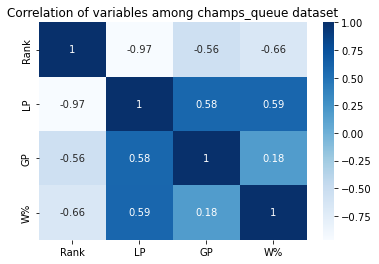

In [22]:
sb.heatmap(champs_queue.corr(), cmap="Blues", annot=True).set_title('Correlation of variables among champs_queue dataset')


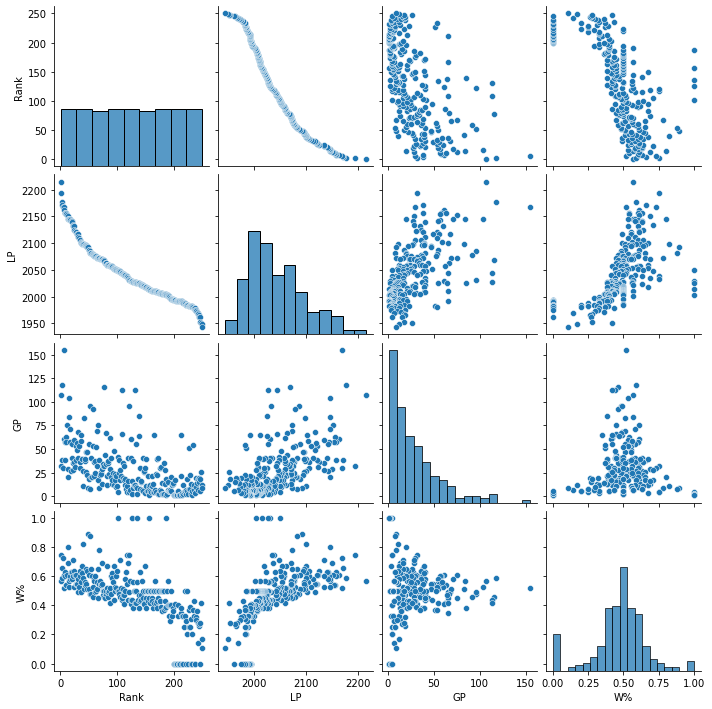

In [23]:
sns.pairplot(champs_queue)

Some players that don't have a team will have a - on the Team field. 

In [24]:
champs_queue[champs_queue['Team']=='-'].sort_values(ascending=False, by=['LP'])

Rank     Player Team    LP  GP    W% OE Rating
9      10       Keel    -  2156  63  0.54        A-
18     19      Ruler    -  2142  27  0.63         A
19     20  DARKWINGS    -  2141  55  0.58         A
31     32      Sword    -  2112  40  0.58         A
47     48    FakeGod    -  2093  47  0.51         B
..    ...        ...  ...   ...  ..   ...       ...
240   241     Burdol    -  1971  14  0.36         C
243   244   Nemesis9    -  1965  19  0.26        C-
245   246     Geiger    -  1961   5  0.00         C
246   247       TOWN    -  1953  18  0.28        C-
248   249      Saico    -  1949  12  0.17        C-

[64 rows x 7 columns]


The `Team` property in the `champs_queue` contains some roster updates from this upcoming off-season that are not relevant to us. It makes sense to remove that. 

In [25]:
# worlds_players = worlds_players.drop(columns=['GP','W%'])
champs_queue = champs_queue.drop(columns=['Team'])
champs_queue_tail = champs_queue_tail.drop(columns=['Team']) 

<AxesSubplot:xlabel='OE Rating'>

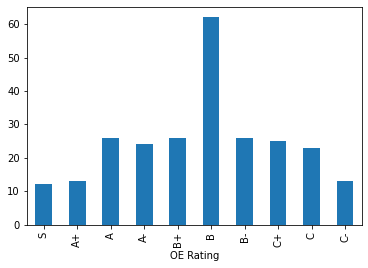

In [26]:
champs_queue.groupby('OE Rating').size().reindex(index=['S','A+','A','A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-']).plot.bar()

You can see that the B rating is the most common in the `champs_queue` dataset

#### `worlds_players`

Text(0.5, 1.0, 'Correlation of variables among worlds_players dataset')

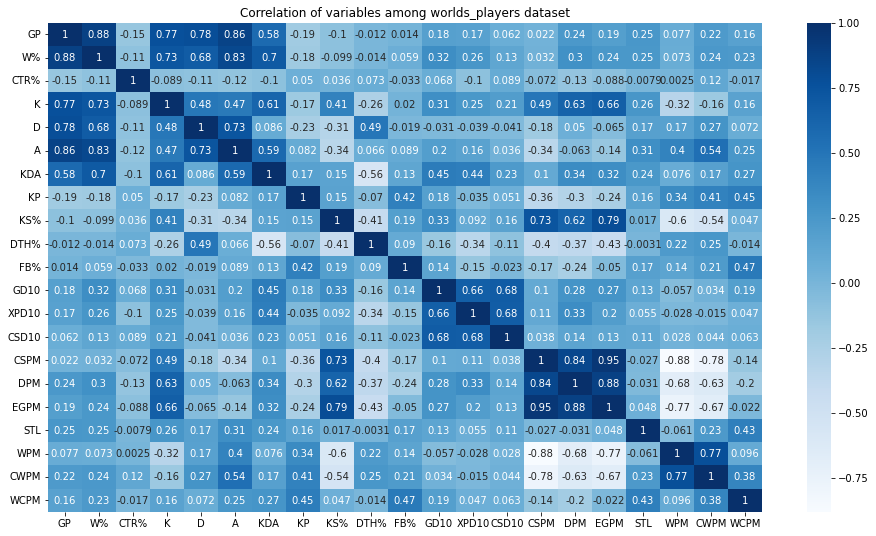

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sb.heatmap(worlds_players.corr(), cmap="Blues", annot=True).set_title('Correlation of variables among worlds_players dataset')

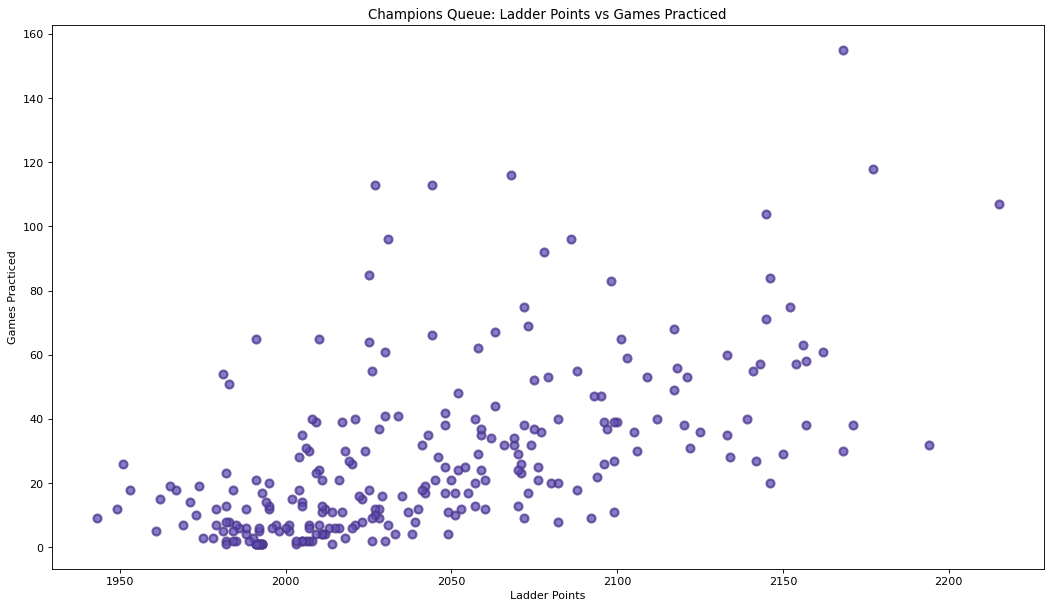

In [28]:
createScatterPlot(
    df=champs_queue,
    name='Champions Queue',
    x = 'LP',
    y = 'GP',
    x_label = 'Ladder Points',
    y_label = 'Games Practiced',
)

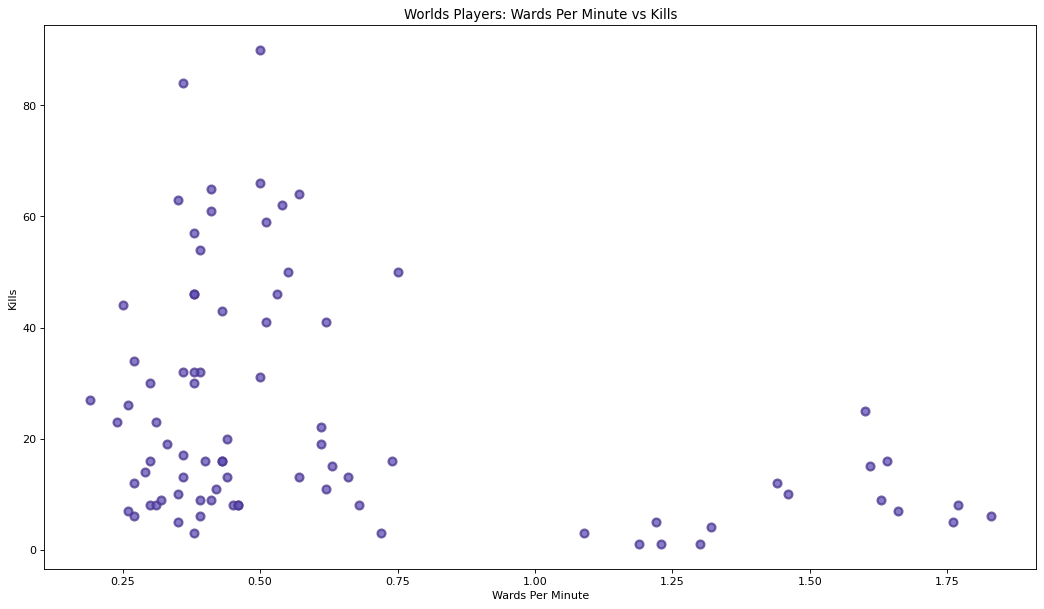

In [29]:
createScatterPlot(
    df = worlds_players,
    name = 'Worlds Players',
    x = 'WPM',
    y = 'K',
    x_label = 'Wards Per Minute',
    y_label = 'Kills',
)

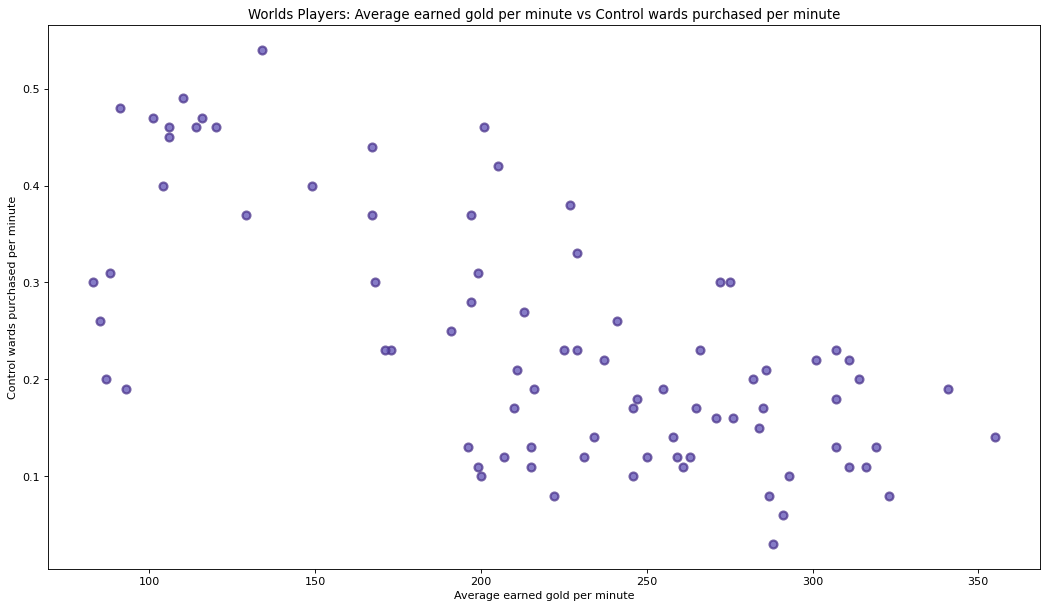

In [30]:
createScatterPlot(
    df = worlds_players,
    name = 'Worlds Players',
    x = 'EGPM',
    y = 'CWPM',
    x_label = 'Average earned gold per minute',
    y_label = 'Control wards purchased per minute',
)

## Step 3:  Identify 1-3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



### Research Questions

#### Not all players who participate in tournaments are known to use Champions Queue.

1. Could you come up with LP values based on tournament games? How does that differ based on the position that you're playing?
1. Could you use the LP values of various players to predict the percentage chance of `Team A` winning against `Team B`?

Since I am trying to predict in the value on one value based on the values of other variables, *this seems like a good candidate for regression*. I was considering using `LogisticRegression` or `PolynomialFeatures`, as I felt that a `LinearRegression` model might be undefitted. I decided against it as this was the simplest to implement and could be reconsidered after trying to get the results. 

### Use `champs_queue` to predict its own `LP` column

In [31]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

I thought to code OE rating to numerical so I can use them in modeling. 

In [32]:
OE_rating = {'S': 9, 'A+': 8, 'A': 7, 'A-': 6, 'B+': 5, 'B': 4, 'B-': 3, 'C+': 2, 'C': 1, 'C-': 0}
champs_queue = champs_queue.replace(OE_rating)
champs_queue['OE Rating'].astype('int')

0      8
1      9
2      9
3      8
4      9
      ..
245    1
246    0
247    1
248    0
249    0
Name: OE Rating, Length: 250, dtype: int64

In [33]:
champs_queue.corr()['LP']

Rank        -0.965353
LP           1.000000
GP           0.579989
W%           0.592438
OE Rating    0.753382
Name: LP, dtype: float64

It looks like `LP`, `GP` and `W%` are all high correlated with LP. That would make sense, as they are coming from the same data source. This should create a fairly accurate model.

In [34]:
X = champs_queue[['OE Rating', 'W%', 'GP']]
y = champs_queue[['LP']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train, y_train

(     OE Rating    W%  GP
 71           5  0.54  24
 160          4  0.45  11
 180          4  0.50   2
 75           3  0.47  34
 59           6  0.57  21
 ..         ...   ...  ..
 67           7  0.78   9
 192          4  0.40   5
 117          5  0.55  11
 47           4  0.51  47
 172          4  0.50   2
 
 [200 rows x 3 columns],
        LP
 71   2070
 160  2011
 180  2005
 75   2069
 59   2076
 ..    ...
 67   2072
 192  1998
 117  2037
 47   2093
 172  2008
 
 [200 rows x 1 columns])

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred_train = model.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(479.6567688612026, 0.8194960457328716)

In [37]:
y_pred_test = model.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(509.63795635359696, 0.7907412042422856)

I might want to apply this model

In [38]:
m = model.coef_[0]
m

array([14.47336353, 33.14416642,  1.14085936])

In [39]:
b = model.intercept_
b

array([1935.60001284])

This intercept is about right, you can except a baseline level of performance out of a new player.

Text(0, 0.5, 'Predicted test data')

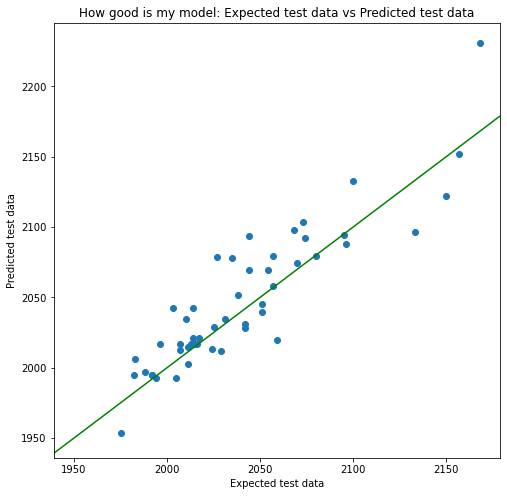

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_test, y=y_pred_test)
x_label='Expected test data'
y_label='Predicted test data'
name='How good is my model'
ax.axline((1950, 1950), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [41]:
def predicted_elo(m, x, b):
    elo = 0
    for index, item in enumerate(m):
        elo += x[index]*item
    
    elo+= + b
    
    return elo[0]
    

In [42]:
predicted_elo(m,(7,0.55,25),b)

2083.664333155322

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_test, y=y_pred_test)

In [43]:
model.intercept_, model.coef_

(array([1935.60001284]), array([[14.47336353, 33.14416642,  1.14085936]]))

The model is not doing too bad. I wonder if I can fill in some LP values for some columns I've dropped. `Spica` and `Inori` seem like good candidates for this.

In [44]:
champs_queue_tail

Rank       Player  LP  GP    W% OE Rating
250   251       Sneaky   0   2  1.00         B
251   252        Spica   0  27  0.56         B
252   253        Inori   0  12  0.25         C
253   254  FrostForest   0   5  0.20        C+
254   255        ry0ma   0   7  0.14         C
255   256     Gryffinn   0   7  0.71        A-
256   257    Nightstar   0   2  1.00         B
257   258     Kim Down   0   2  1.00        A-
258   259     Mobility   0   1  0.00         C

In [45]:
predicted_elo(m,(4,0.56,27),b), predicted_elo(m,(1,0.25,12),b) # Spica, Inori

(2042.8574029724512, 1972.0497303434759)

In [46]:
predicted_elo(m,(6,0.71,7),b) # Griffin

2053.95856770303

I feel comfortable adding Spica and Inori back into the dataset 

In [47]:
champs_queue_tail.at[251, 'LP'] = predicted_elo(m,(4,0.56,27),b)
champs_queue_tail.at[252, 'LP'] = predicted_elo(m,(1,0.25,12),b)
champs_queue = pd.concat([champs_queue,champs_queue_tail.iloc[1:3]])
champs_queue

Rank   Player           LP   GP    W% OE Rating
0       1     Eyla  2215.000000  107  0.57         8
1       2    Viper  2194.000000   32  0.75         9
2       3   CoreJJ  2177.000000  118  0.59         9
3       4    Tomio  2171.000000   38  0.66         8
4       5  Prismal  2168.000000   30  0.73         9
..    ...      ...          ...  ...   ...       ...
247   248    Niles  1951.000000   26  0.42         1
248   249    Saico  1949.000000   12  0.17         0
249   250     Joey  1943.000000    9  0.11         0
251   252    Spica  2042.857403   27  0.56         B
252   253    Inori  1972.049730   12  0.25         C

[252 rows x 6 columns]

There is further work to be done here in terms of ranking the dataframe. However, since I plan to merge these dataframes, I don't think I'll use the values added as they aren't on current world's participating teams. Fun fact: `Inori` is a coach for a team. I would guess that they are using him as role player if a practice team is short a player, which would explain his low rating, win rate, and game count. 

### Using `worlds_data` to create a regression model on `LP` in `champs_queue`

In [48]:
df = worlds_players.merge(champs_queue, on='Player', how='inner')
df.sort_values(by=['LP'], ascending=False)

Player           Team      Pos  GP_x  W%_x  CTR%   K   D    A  KDA  ...  \
62     Viper  EDward Gaming      ADC    11  0.55  0.55  46  20   58  5.2  ...   
23  Inspired  Evil Geniuses   Jungle     6  0.17  0.83  13  14   24  2.6  ...   
68      Zeus             T1      Top    18  0.72  0.61  65  57  119  3.2  ...   
36    knight    Top Esports   Middle     6  0.50  0.50  26   7   33  8.4  ...   
44   Missing      JD Gaming  Support    14  0.71  0.57  15  41  144  3.9  ...   
..       ...            ...      ...   ...   ...   ...  ..  ..  ...  ...  ...   
51    Razork         Fnatic   Jungle     6  0.33  0.67   9  16   31  2.5  ...   
40      Levi    GAM Esports   Jungle     6  0.17  0.17  16  27   34  1.9  ...   
27    Jiejie  EDward Gaming   Jungle    11  0.55  0.36  19  29   86  3.6  ...   
26    Jensen         Cloud9   Middle     6  0.17  0.50  16  17   13  1.7  ...   
60    Trymbi          Rogue  Support    10  0.40  0.40   3  31   70  2.4  ...   

    GOLD%  STL   WPM  CWPM  WCPM  Rank      LP  GP_y  W%_y  OE Rating  
62  27.2%    0  0.53  0.22  0.39     2  2194.0    32  0.75          9  
23  21.2%    0  0.44  0.17  0.50     7  2162.0    61  0.61          8  
68  22.9%    0  0.41  0.21  0.16     8  2157.0    38  0.63          8  
36  26.1%    0  0.26  0.11  0.30     9  2157.0    58  0.60          9  
44   9.4%    0  1.61  0.47  0.27    11  2154.0    57  0.54          5  
..    ...  ...   ...   ...   ...   ...     ...   ...   ...        ...  
51  16.6%    0  0.32  0.30  0.39   195  1996.0     6  0.50          4  
40  20.8%    2  0.74  0.27  0.56   225  1984.0     2  0.00          3  
27  17.6%    0  0.61  0.28  0.64   224  1984.0    18  0.50          4  
26  24.9%    0  0.30  0.14  0.13   234  1981.0    54  0.37          0  
60   8.5%    0  1.09  0.19  0.31   239  1974.0    19  0.32          0  

[70 rows x 33 columns]

In [49]:
team_avg_lp = df.groupby(by=['Team']).mean()['LP'].sort_values(ascending=False)
team_avg_lp

Team
DRX                   2107.600000
Evil Geniuses         2105.800000
T1                    2099.600000
JD Gaming             2096.200000
Top Esports           2095.000000
DWG KIA               2082.800000
G2 Esports            2066.000000
Rogue                 2064.600000
Gen.G                 2063.000000
100 Thieves           2057.000000
EDward Gaming         2056.800000
Fnatic                2053.750000
CTBC Flying Oyster    2050.500000
GAM Esports           2028.333333
Cloud9                2021.400000
Name: LP, dtype: float64

It's really interesting that DRX pops to the top of the list here

In [50]:
df.groupby(by=['Team']).mean()['W%_y'].sort_values(ascending=False)

Team
Fnatic                0.645000
DRX                   0.608000
DWG KIA               0.604000
T1                    0.600000
Top Esports           0.560000
Rogue                 0.556000
Evil Geniuses         0.540000
JD Gaming             0.530000
EDward Gaming         0.526000
CTBC Flying Oyster    0.525000
G2 Esports            0.523333
100 Thieves           0.504000
Gen.G                 0.490000
Cloud9                0.422000
GAM Esports           0.323333
Name: W%_y, dtype: float64

In [51]:
df.groupby(by=['Team']).mean()['GP_y'].sort_values(ascending=False)

Team
Evil Geniuses         58.00
Cloud9                46.80
JD Gaming             45.20
Top Esports           45.20
DRX                   38.60
G2 Esports            38.00
CTBC Flying Oyster    32.50
T1                    32.00
100 Thieves           31.20
EDward Gaming         24.40
Gen.G                 24.25
DWG KIA               23.40
Rogue                 22.80
GAM Esports           15.00
Fnatic                13.50
Name: GP_y, dtype: float64

They had no business making the finals, yet their **practice showcases their surge**. 

Background:
1. DRX narrowly qualify for worlds as a fourth seed from Korea, reverse sweeping against two other competitive Korean teams. 
1. DRX top their group going 4-2.
1. DRX beats EDG, a in a reverse sweep against the third seed team from China
1. DRX upset GENG in a 3-1, which is the first seed team from Korea.
1. DRX beats T1, the second seed from Korea, in the most watched League of Legends event thus far with 5.1 million concurrent viewers. 

Funny enough, their support `BeryL` did not practice using this form at all 🤔



In [52]:
df.corr()['LP'].sort_values(ascending=False)[:11]

LP      1.000000
W%_y    0.668253
GP_y    0.415038
KDA     0.339557
K       0.311959
W%_x    0.243050
GP_x    0.211154
CTR%    0.209022
EGPM    0.203521
A       0.201037
DPM     0.176653
Name: LP, dtype: float64

wondering in aggregate, what correlates to high LP

In [53]:
X = df[['W%_x', 'KDA', 'EGPM', 'A', 'DPM']]
y = df[['LP']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # test size is larger as sample is small

In [54]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
y_pred_train = model.predict(x_train)

print(mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train))

2186.142947540313 -4.726373371406604


In [56]:
y_pred_test = model.predict(x_test)
print(mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test))

2824.3724877113987 -4.546422422649613


Text(0, 0.5, 'Predicted test data')

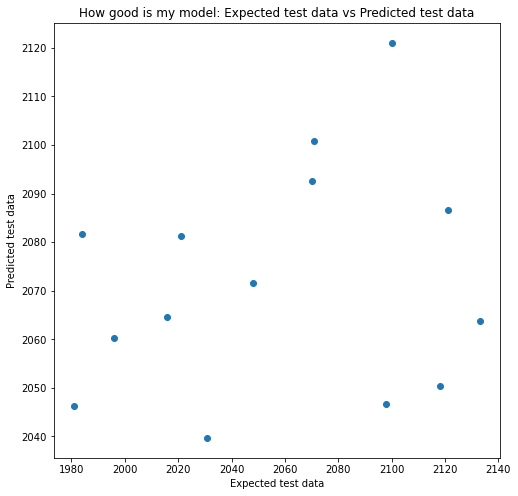

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_test, y=y_pred_test)
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

These are very low correlated in total. I'm wondering if this looks better if you try to segment the data by position. 

Hypothesis: Different positions need different formulas for predicting LP.

#### Grouping by position

##### Support

In [58]:
df_positional = df.groupby(['Pos']).corr()['LP']
medium_correlation = 0.3

In [59]:
regression_components = {'Top': df_positional['Top'][df_positional['Top'] > medium_correlation].sort_values(ascending=False),
'Jungle': df_positional['Jungle'][df_positional['Jungle'] > medium_correlation].sort_values(ascending=False),
'Middle': df_positional['Middle'][df_positional['Middle'] > medium_correlation].sort_values(ascending=False),
'AD Carry': df_positional['ADC'][df_positional['ADC'] > medium_correlation].sort_values(ascending=False),
'Support': df_positional['Support'][df_positional['Support'] > medium_correlation].sort_values(ascending=False)}

In [60]:
regression_components['Support']

LP      1.000000
W%_y    0.849653
WPM     0.710675
EGPM    0.655900
CWPM    0.614488
CTR%    0.451889
KDA     0.398900
K       0.376277
W%_x    0.331207
KS%     0.317361
Name: LP, dtype: float64

In [61]:
df_support = df[df['Pos']=='Support']
df_support_X = df_support[['WPM', 'EGPM', 'CWPM', 'CTR%']]
df_support_y = df_support[['LP']]

model_sup = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_support_X, df_support_y, test_size=0.35, random_state=0) # test size is larger as sample is small
model_sup.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred_train = model_sup.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(303.58630177375767, 0.8171828961113419)

In [63]:
y_pred_test = model_sup.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(1211.786492949615, 0.7037690385626163)

Text(0, 0.5, 'Predicted training')

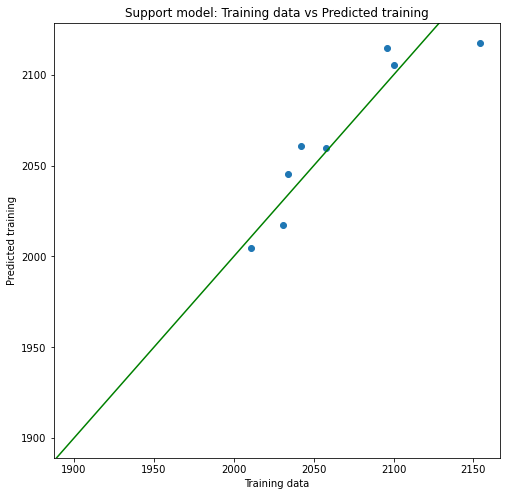

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_train, y=y_pred_train)
x_label='Training data'
y_label='Predicted training'
name='Support model'
ax.axline((1900,1900), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

**For support, it is signigicantly more accurate to predict LP with the given stats. However, the dataset is really small and could benefit from more data** 

I thought about writing a function to do this for other positions, but think it's a little bit of an art and science for how I'm picking the features. 

##### AD Carry

In [65]:
regression_components['AD Carry']

LP      1.000000
W%_y    0.586186
DPM     0.576914
W%_x    0.414355
CSPM    0.386058
KDA     0.336048
Name: LP, dtype: float64

In [66]:
df_adc = df[df['Pos']=='AD Carry']
df_adc_X = df_support[['W%_x', 'DPM', 'CSPM', 'KDA']]
df_adc_y = df_support[['LP']]

model_adc = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_adc_X, df_adc_y, test_size=0.35, random_state=0) # test size is larger as sample is small
model_adc.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred_train = model_adc.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(582.1889019167625, 0.5787340864714103)

In [68]:
y_pred_test = model_adc.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(10865.347357653745, -7.346339124630832)

Text(0, 0.5, 'Predicted training')

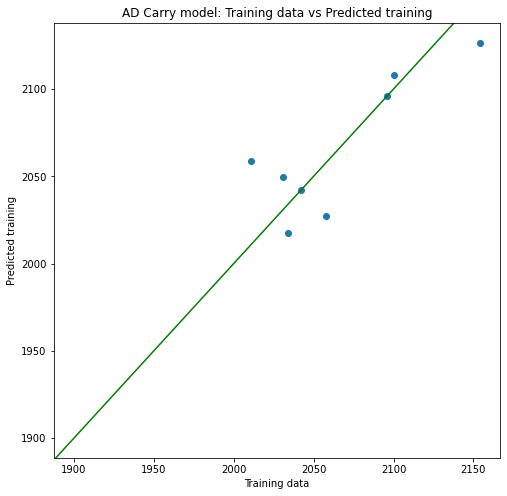

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_train, y=y_pred_train)
x_label='Training data'
y_label='Predicted training'
name='AD Carry model'
ax.axline((1900,1900), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

##### Middle

In [70]:
regression_components['Middle']

LP      1.000000
WCPM    0.589232
KDA     0.531532
W%_y    0.529933
W%_x    0.526471
K       0.421954
A       0.410369
EGPM    0.407034
GP_x    0.381930
GD10    0.359140
FB%     0.342857
Name: LP, dtype: float64

In [71]:
df_mid = df[df['Pos']=='Middle']
df_mid_X = df_mid[['WCPM', 'KDA', 'W%_y']]
df_mid_y = df_mid[['LP']]

model_mid = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_mid_X, df_mid_y, test_size=0.35, random_state=0) # test size is larger as sample is small
model_mid.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred_train = model_mid.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(631.5200385765421, 0.47391631755532404)

In [73]:
y_pred_test = model_mid.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(1577.7838489394992, 0.22795171557392935)

Text(0, 0.5, 'Predicted training')

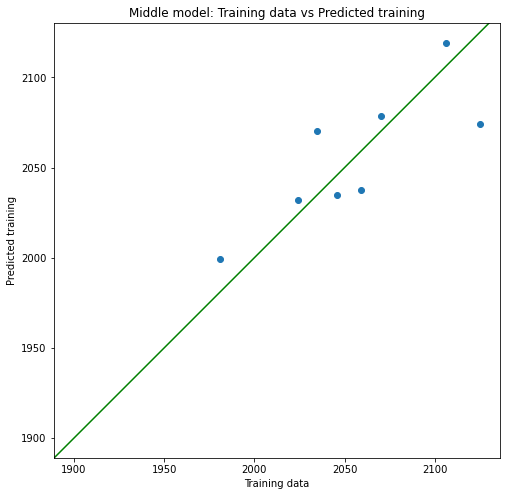

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_train, y=y_pred_train)
x_label='Training data'
y_label='Predicted training'
name='Middle model'
ax.axline((1900,1900), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

##### Jungle

In [75]:
regression_components['Jungle']

LP      1.000000
GP_y    0.767752
W%_y    0.653467
CTR%    0.457002
KS%     0.315205
Name: LP, dtype: float64

In [76]:
df_jg = df[df['Pos']=='Jungle']
df_jg_X = df_mid[['CTR%', 'KS%', 'WPM']]
df_jg_y = df_mid[['LP']]

model_jg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_jg_X, df_jg_y, test_size=0.35, random_state=0) # test size is larger as sample is small
model_jg.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pred_train = model_jg.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(1391.4772816487643, -2.1591440581341073)

In [78]:
y_pred_test = model_jg.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(41145.710955569775, -0.4599413807191497)

Text(0, 0.5, 'Predicted training')

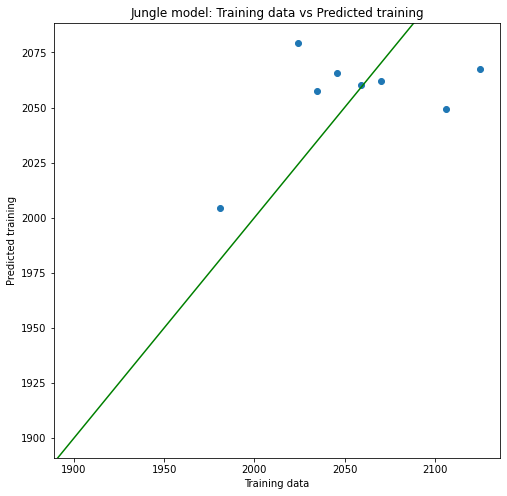

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_train, y=y_pred_train)
x_label='Training data'
y_label='Predicted training'
name='Jungle model'
ax.axline((1900,1900), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

##### Top

In [80]:
regression_components['Top']

LP      1.000000
GP_y    0.709913
W%_y    0.709415
A       0.525663
D       0.521809
K       0.517020
CWPM    0.500986
WPM     0.498041
GP_x    0.439902
KP      0.436131
DTH%    0.407856
Name: LP, dtype: float64

In [81]:
df_top = df[df['Pos']=='Top']
df_top_X = df_mid[['A', 'K', 'CWPM', 'WPM', 'KP', 'DTH%']]
df_top_y = df_mid[['LP']]

model_top = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_top_X, df_top_y, test_size=0.35, random_state=0) # test size is larger as sample is small
model_top.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred_train = model_top.predict(x_train)
mean_squared_error(y_pred_train, y_train), r2_score(y_pred_train, y_train)

(9.79328931681447, 0.994625403818536)

In [83]:
y_pred_test = model_top.predict(x_test)
mean_squared_error(y_pred_test, y_test), r2_score(y_pred_test, y_test)

(12931.814899404633, -0.6529509829931279)

Text(0, 0.5, 'Predicted training')

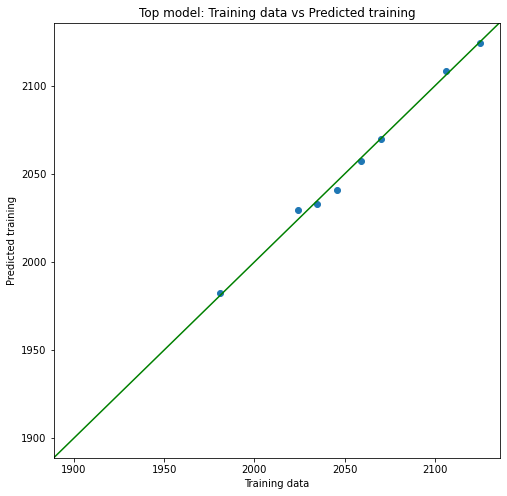

In [84]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(x=y_train, y=y_pred_train)
x_label='Training data'
y_label='Predicted training'
name='Top model'
ax.axline((1900,1900), slope=1,color='green')
plt.title(f'{name}: {x_label} vs {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

Tried to do this by position and with the small datasets, feels as if this is mostly luck as to how good it the algorithm is doing. Training is good, but test is really off.

### Applying ELO values to the `worlds_players` dataset

In [85]:
top = worlds_players[worlds_players['Pos']=='Top']
jungle = worlds_players[worlds_players['Pos']=='Jungle']
mid = worlds_players[worlds_players['Pos']=='Middle']
adc = worlds_players[worlds_players['Pos']=='ADC']
support = worlds_players[worlds_players['Pos']=='Support']

In [86]:
# This was the model applied to all players. This model is very inaccurate. 
# ['W%_x', 'KDA', 'EGPM', 'A', 'DPM']
# df['LP'] = 
(
    model.coef_[0][0] * worlds_players['W%']
    + model.coef_[0][1] * worlds_players['KDA']
    + model.coef_[0][2] * worlds_players['EGPM']
    + model.coef_[0][3] * worlds_players['A']
    + model.coef_[0][4] * worlds_players['DPM']
    + model.intercept_[0]
)

0      270.473465
1     1101.648018
2     4151.452487
3     1702.517345
4     1562.218539
         ...     
77    1110.013138
78     945.063224
79    1865.178647
80     400.482578
81    1863.766492
Length: 82, dtype: float64

In [87]:
# Support
# ['WPM', 'EGPM', 'CWPM', 'CTR%']
sup_elo = (
    support['WPM'] * model_sup.coef_[0][0]
    + support['EGPM'] * model_sup.coef_[0][1]
    + support['CWPM'] * model_sup.coef_[0][2]
    + support['CTR%'] * model_sup.coef_[0][3]
    + model_sup.intercept_[0]
)
support['LP'] = sup_elo
worlds_players.loc[worlds_players["Pos"] == "Support", "LP"] = sup_elo

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_51806/2588143226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support['LP'] = sup_elo


In [88]:
# ADC
# ['W%_x', 'DPM', 'CSPM', 'KDA']
adc_elo = (
    model_adc.coef_[0][0] * adc['W%']
    + model_adc.coef_[0][1] * adc['DPM']
    + model_adc.coef_[0][2] * adc['CSPM']
    + model_adc.coef_[0][3] * adc['KDA']
    + model_adc.intercept_[0]
)
adc['LP'] = adc_elo
worlds_players.loc[worlds_players["Pos"] == "ADC", "LP"] = adc_elo

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_51806/1861140441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adc['LP'] = adc_elo


Of all my models, mid is the most incorrect. Since top is the lane most similar to mid, I decided to use that model and apply that to the stats of mid laners. The results were much closer to expected(Mid model was producing negative values, and values over 4000 LP which are impossible)

In [89]:
# Mid
# ['WCPM', 'KDA', 'W%_x', 'EGPM']
mid_elo = (
    model_top.coef_[0][0] * mid['A']
    + model_top.coef_[0][1] * mid['K']
    + model_top.coef_[0][2] * mid['CWPM']
    + model_top.coef_[0][3] * mid['WPM']
    + model_top.coef_[0][4] * mid['KP']
    + model_top.coef_[0][5] * mid['DTH%']
    + model_top.intercept_[0]
)
mid['LP'] = mid_elo
worlds_players.loc[worlds_players["Pos"] == "Middle", "LP"] = mid_elo

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_51806/2734458142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid['LP'] = mid_elo


In [90]:
# Jungle
# ['CTR%', 'KS%', 'WPM']
jungle_elo = (
    model_jg.coef_[0][0] * jungle['CTR%']
    + model_jg.coef_[0][1] * jungle['KS%']
    + model_jg.coef_[0][2] * jungle['WPM']
    + model_jg.intercept_[0]
)
jungle['LP'] = jungle_elo
worlds_players.loc[worlds_players["Pos"] == "Jungle", "LP"] = jungle_elo

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_51806/3838469264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jungle['LP'] = jungle_elo


In [91]:
# Top
# ['A', 'K', 'CWPM', 'WPM', 'KP', 'DTH%']
top_elo = (
    model_top.coef_[0][0] * top['A']
    + model_top.coef_[0][1] * top['K']
    + model_top.coef_[0][2] * top['CWPM']
    + model_top.coef_[0][3] * top['WPM']
    + model_top.coef_[0][4] * top['KP']
    + model_top.coef_[0][5] * top['DTH%']
    + model_top.intercept_[0]
)
top['LP'] = top_elo
worlds_players.loc[worlds_players["Pos"] == "Top", "LP"] = top_elo

/var/folders/fd/qmhdtpdj7kj77ftrqfj87hmc0000gn/T/ipykernel_51806/2607946215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['LP'] = top_elo


In [92]:
worlds_players

Player                 Team      Pos  GP    W%  CTR%   K   D    A  KDA  \
0         369            JD Gaming      Top  14  0.71  0.57  46  47   89  2.9   
1   Abbedagge          100 Thieves   Middle   6  0.17  0.67  11  17   23  2.0   
2       Atlen   CTBC Flying Oyster      ADC   1  0.00  1.00   3   5    2  1.0   
3   Berserker               Cloud9      ADC   6  0.17  0.83   8  12   16  2.0   
4       BeryL                  DRX  Support  21  0.67  0.57  16  47  168  3.9   
..        ...                  ...      ...  ..   ...   ...  ..  ..  ...  ...   
77     Xiaohu  Royal Never Give Up   Middle  10  0.50  0.70  27  26   48  2.9   
78      Yagao            JD Gaming   Middle  14  0.71  0.29  34  37  100  3.6   
79       Zeka                  DRX   Middle  21  0.67  0.43  84  33   86  5.2   
80       Zeus                   T1      Top  18  0.72  0.61  65  57  119  3.2   
81       Zven               Cloud9  Support   6  0.17  0.50   5  27   18  0.9   

    ...  DPM   DMG%  D%P15  EGPM  GOLD%  STL   WPM  CWPM  WCPM           LP  
0   ...  594  25.1%  22.7%   265  21.6%    0  0.38  0.17  0.22  2123.264587  
1   ...  454  27.2%  29.4%   246  24.2%    0  0.42  0.17  0.17  2029.829508  
2   ...  163  11.2%   8.5%   271  26.6%    0  0.38  0.16  0.41  2267.798932  
3   ...  389  22.2%  25.1%   246  25.9%    0  0.45  0.10  0.16  2623.910790  
4   ...  292  13.3%  11.7%   120  10.1%    0  1.64  0.46  0.41  2129.004234  
..  ...  ...    ...    ...   ...    ...  ...   ...   ...   ...          ...  
77  ...  488  25.3%  26.5%   263  22.3%    0  0.19  0.12  0.28  1993.879954  
78  ...  524  22.1%  22.8%   261  21.0%    0  0.27  0.11  0.28  2132.303073  
79  ...  481  22.7%  23.0%   301  25.9%    0  0.36  0.22  0.25  2108.644223  
80  ...  622  25.0%  22.8%   286  22.9%    0  0.41  0.21  0.16  2176.555935  
81  ...  151   8.8%   7.2%    87   9.1%    0  1.22  0.20  0.27  2017.072041  

[82 rows x 29 columns]

### Finding probabilities based on ELO

In [93]:
# Taken from https://en.wikipedia.org/wiki/Elo_rating_system
def getProbabilityOfWin(Ra, Rb):
    Ea = 1/(1+pow(10,(Rb-Ra)/400))
    Eb = 1 - Ea
    return (Ea, Eb)

In [94]:
new_team_avg_lp = worlds_players.groupby(by=['Team']).mean()['LP'].sort_values(ascending=False)
team_avg_lp, new_team_avg_lp

(Team
 DRX                   2107.600000
 Evil Geniuses         2105.800000
 T1                    2099.600000
 JD Gaming             2096.200000
 Top Esports           2095.000000
 DWG KIA               2082.800000
 G2 Esports            2066.000000
 Rogue                 2064.600000
 Gen.G                 2063.000000
 100 Thieves           2057.000000
 EDward Gaming         2056.800000
 Fnatic                2053.750000
 CTBC Flying Oyster    2050.500000
 GAM Esports           2028.333333
 Cloud9                2021.400000
 Name: LP, dtype: float64,
 Team
 DRX                    2373.401512
 JD Gaming              2317.740947
 T1                     2314.077973
 DWG KIA                2284.638695
 Royal Never Give Up    2279.599325
 Top Esports            2278.822624
 EDward Gaming          2275.483981
 GAM Esports            2258.827043
 Gen.G                  2252.430968
 Rogue                  2239.541196
 G2 Esports             2215.710188
 CTBC Flying Oyster     2195.134063
 Evi

In [95]:
getProbabilityOfWin(team_avg_lp['DRX'],team_avg_lp['T1']) # let me try these with the predicted ELO values.

(0.5115108912177917, 0.4884891087822083)

According to this, there is a 51% chance of DRX winning vs T1

This works great at comparing the relative strength of one player to another, but starts to fall apart for teams.

I could simply average the elo among members of a team, which is fine. I'm wondering if there a better way to calculating ELO. 

### Using `Trueskill` to predict winning percentages as a team


https://en.wikipedia.org/wiki/TrueSkill

In [96]:
!pip install trueskill
from trueskill import Rating
import trueskill

In [97]:
avg_LP = champs_queue['LP'].mean()

In [98]:
# Values i'm passing are recommendations from the documentation according to my dataset
r = trueskill.TrueSkill(mu=avg_LP,sigma=avg_LP/3, beta=avg_LP/6, tau=(avg_LP/300),  draw_probability=0.0)
r

trueskill.TrueSkill(mu=2042.686, sigma=680.895, beta=340.448, tau=6.809, draw_probability=0.0%)

In [99]:
# this was taken from Juno Snellman in an issue for Trueskill - https://github.com/sublee/trueskill/issues/1#issuecomment-149762508
# probability of team1 winning 
import itertools
import math

def win_probability(team1, team2):
    delta_mu = sum(r.mu for r in team1) - sum(r.mu for r in team2)
    sum_sigma = sum(r.sigma ** 2 for r in itertools.chain(team1, team2))
    size = len(team1) + len(team2)
    denom = math.sqrt(size * (r.beta * r.beta) + sum_sigma)
    ts = trueskill.global_env()
    return ts.cdf(delta_mu / denom)

Let me try to use

In [100]:
team_1 = 'DRX'
team_2 = 'T1'

worlds_players[worlds_players['Team'] == team_1]

Player Team      Pos  GP    W%  CTR%   K   D    A  KDA  ...  DPM   DMG%  \
4    BeryL  DRX  Support  21  0.67  0.57  16  47  168  3.9  ...  292  13.3%   
14    Deft  DRX      ADC  21  0.67  0.43  66  37   97  4.4  ...  565  26.6%   
36   Juhan  DRX   Jungle   1  0.00  1.00   3   4    6  2.3  ...  357  17.8%   
43  Kingen  DRX      Top  21  0.67  0.33  57  46  106  3.5  ...  475  22.2%   
59  Pyosik  DRX   Jungle  20  0.70  0.55  50  33  131  5.5  ...  314  15.0%   
79    Zeka  DRX   Middle  21  0.67  0.43  84  33   86  5.2  ...  481  22.7%   

    D%P15  EGPM  GOLD%  STL   WPM  CWPM  WCPM           LP  
4   11.7%   120  10.1%    0  1.64  0.46  0.41  2129.004234  
14  28.7%   307  26.2%    0  0.50  0.18  0.27  2878.132938  
36  19.2%   167  17.2%    0  0.72  0.44  0.25  2474.865694  
43  20.8%   241  20.4%    0  0.38  0.26  0.24  2156.432301  
59  15.6%   205  17.3%    3  0.75  0.42  0.66  2493.329679  
79  23.0%   301  25.9%    0  0.36  0.22  0.25  2108.644223  

[6 rows x 29 columns]

In [101]:
worlds_players[worlds_players['Team'] == team_2]

Player Team      Pos  GP    W%  CTR%   K   D    A  KDA  ...  DPM   DMG%  \
17     Faker   T1   Middle  18  0.72  0.67  61  56   96  2.8  ...  612  24.5%   
24  Gumayusi   T1      ADC  18  0.72  0.56  90  26  107  7.6  ...  625  25.3%   
41     Keria   T1  Support  18  0.72  0.33  25  29  196  7.6  ...  262  10.7%   
57      Oner   T1   Jungle  18  0.72  0.44  50  43  145  4.5  ...  360  14.5%   
80      Zeus   T1      Top  18  0.72  0.61  65  57  119  3.2  ...  622  25.0%   

    D%P15  EGPM  GOLD%  STL   WPM  CWPM  WCPM           LP  
17  25.0%   266  21.0%    0  0.41  0.23  0.18  2124.619547  
24  27.2%   341  27.3%    3  0.50  0.19  0.33  2923.042818  
41   9.5%   134  10.8%    0  1.60  0.54  0.21  2105.333302  
57  15.4%   229  18.1%    6  0.55  0.33  0.42  2240.838260  
80  22.8%   286  22.9%    0  0.41  0.21  0.16  2176.555935  

[5 rows x 29 columns]

In [102]:
t1 = [Rating(2156), Rating(2474), Rating(2108), Rating(2878), Rating(2129)] # DRX
t2 = [Rating(2176), Rating(2240), Rating(2124), Rating(2923), Rating(2105)] # T1

win_probability(t1,t2), 1-win_probability(t1,t2)

(0.5652756261928195, 0.43472437380718054)

According to this, there is a 56% chance of DRX winning vs T1

## Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [103]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

Text(0.5, 1.0, 'Distribution of Predicted LP values')

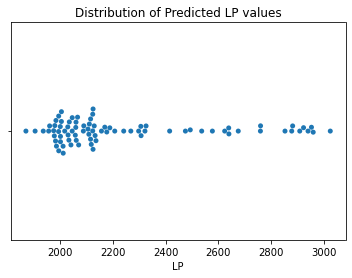

In [104]:
sns.swarmplot(x = worlds_players['LP']).set_title('Distribution of Predicted LP values')

### What did I learn from the data? How did it answer the research questions? 


I learned how hard it is to simulate something like ELO. I think it was really nice that I was able to bring back some rows in the `champs_queue` dataframe by using the regression algorithm to do so. The support regression shown above did an amazing job of predicting support, which I was very surprised by. The middle lane regression algorithm ended up doing extremely poorly(as seen above), to the point of needing to use a different model from a different position to predict middle lane ELO. I think the fact that I came up with *any* values at all by connecting two related but different data sources was very satisfying. It made sense that you could create a model off of inner join dataframe `df`, then applying that result to `champs_queue`. That felt great to work through. 

I think it was the right call to split the data by position, and showed that performance per role takes a different role entirely. When trying to create an aggregate model, that performed the worst. Something I wish I had paid more attention to earlier are was realizing how those slices by `Position` were really small. I think it would have made sense to have grabbed other data sources in attempt to have more accurate results. 

I was originally intending to use an average of LP, but ran into `TrueSkill` and wanted to use it. There was more on that front that could be explored, and thought that method of predicting team performance was very elegant. For instance, TrueSkill builds upon ELO by introducing the idea of variance in performance. The more games that is recorded in play, the smaller the variance is.  

### Assumptions and Limitations

####  Limitations
* I noticed that the values for `AD carry` were rather inflated compared to other ELO values. This could be adjusted with future iterations.
* I talked about this in Part 3, but my Mid model was not accurate at all. I ended up using a model from another position(Top) that did a better job of modeling elo. 
* Small datasets. According to Gabriel, a rough heuristic for how many entries is between 200 and 10000 values. I think I would have ideally wanted more data. 
* This assumes that all positions have the same impact. I don't think this is the case. 
* In league there are usally advnatages based on what side you're playin on. I think it would make sense to come up with an `x` point handicap based on side selection. The value of `x` should change based around how teams are playing.  
* For teams that didn't process past group stage, the minimum amount of games played is six. You could be a bad player on a good team, but you had a smaller sample set in this instance.
* It would have been awesome to have used `TrueSkill` to simulate games, and thus bring the `sigma` value down to reduce variance in elo in the model. 
* Off-meta strategies where Supports take carrries' golds, junglers take midlaner's resources could skew the model's stats. This didn't happen in this case, but could in the future.

#### Assumptions
1. Ladder points are a good prediction of skill
1. Elo is perfectly one-to-one with LP
1. The models that I produced were accurate, and our ELO is following a normal distribution, with values that can be calculated linearly. In the League ranked ladder, I am aware that the distribution is bimodal in shape. 